# Python 用Pillow进行简单的图像操作。
## 颜色与RGBA值
计算机通常将图像表示为RGB值，或者再加上alpha值（通透度，透明度），称为RGBA值。在Pillow中，RGBA的值表示为由4个整数组成的元组，分别是R、G、B、A。整数的范围0~255。RGB全0就可以表示黑色，全255代表黑色。可以猜测(255, 0, 0, 255)代表红色，因为R分量最大，G、B分量为0，所以呈现出来是红色。但是当alpha值为0时，无论是什么颜色，该颜色都不可见，可以理解为透明。

[链接](https://www.jianshu.com/p/81f774d98562)

In [1]:
from PIL import ImageColor
print(ImageColor.getcolor('red','RGBA'))
print(ImageColor.getcolor('black','RGB'))

(255, 0, 0, 255)
(0, 0, 0)


## 图像的坐标表示
图像中左上角是坐标原点(0, 0)，这和平常数学里的坐标系不太一样。这样定义的坐标系意味着，X轴是从左到右增长的，而Y轴是从上到下增长。

在Pillow中如何使用上述定义的坐标系表示一块矩形区域？许多函数或方法要求提供一个矩形元组参数。元组参数包含四个值，分别代表矩形四条边的距离X轴或者Y轴的距离。顺序是(左，顶，右，底)。右和底坐标稍微特殊，表示直到但不包括。可以理解为[左, 右)和[顶， 底)这样左闭右开的区间。比如(3, 2, 8, 9)就表示了横坐标范围[3, 7]；纵坐标范围[2, 8]的矩形区域。

## 使用Pillow操作图像
了解了一些基础知识，可以上手了。首先从读取图片开始，很多图像处理库（如opencv）都以`imread()`读取图片。Pillow中使用`open`方法。

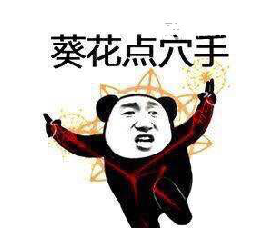

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

im = Image.open('葵花点穴手.jpg')
plt.figure()
plt.imshow(im)
plt.axis('off')
plt.show()

In [29]:
width,height=im.size
print(im.size,width,height)
print(im.format,im.format_description)

(240, 240) 240 240
JPEG JPEG (ISO 10918)


`im.size`返回一个元组，分别是宽和高。`show()`方法会调用系统默认图像查看软件，打开并显示。`im.format`可查看图像的格式。`save()`可保存处理后的图片，如果未经处理，保存后的图像占用的空间(字节数)一般也与原图像不一样，可能经过了压缩。

## 新建图像
Pillow也可以新建空白图像, 第一个参数是mode即颜色空间模式，第二个参数指定了图像的分辨率(宽x高)，第三个参数是颜色。

* 可以直接填入常用颜色的名称。如'red'
* 也可以填入十六进制表示的颜色，如#FF0000表示红色。
* 还能传入元组，比如(255, 0, 0, 255)或者(255， 0， 0)表示红色。


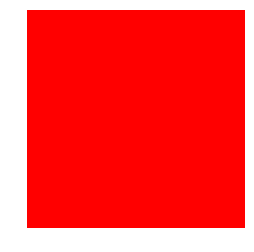

In [36]:
# 通常使用RGB模式就可以了
newIm= Image.new('RGB', (100, 100), 'red')
plt.imshow(newIm)
plt.axis('off')
plt.show
newIm.save('1.png')

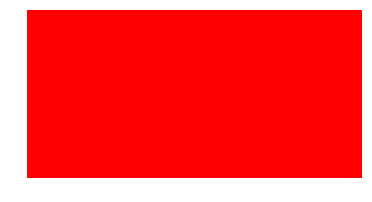

In [37]:
# 也可以用RGBA模式，还有其他模式查文档吧
blcakIm = Image.new('RGB',(200, 100), 'red')
plt.imshow(blcakIm)
plt.axis('off')
plt.show()
blcakIm.save('2.png')

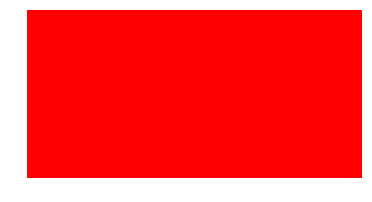

In [38]:
# 十六进制颜色
blcakIm = Image.new('RGBA',(200, 100), '#FF0000')
blcakIm.save('3.png')
plt.imshow(blcakIm)
plt.axis('off')
plt.show()

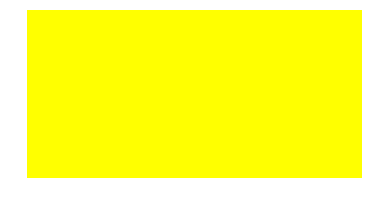

In [39]:
# 传入元组形式的RGBA值或者RGB值
# 在RGB模式下，第四个参数失效，默认255，在RGBA模式下，
# 也可只传入前三个值，A值默认255
blcakIm = Image.new('RGB',(200, 100), (255, 255, 0, 120))
plt.imshow(blcakIm)
plt.axis('off')
plt.show()
blcakIm.save('4.png')